# Notebook to create Bayesian spline ORF plot


In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
import la_forge.core as co

%config InlineBackend.figure_format='retina'
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

### Plotting specifications

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
with open('../ng15_rcparams.json', 'rb') as fin:
    plt.rcParams.update(json.load(fin))
plt.rcParams['text.latex.preamble'] = (
    r'\usepackage{amsmath}'
    r'\usepackage{amsbsy}'
    r'\DeclareMathAlphabet{\mathcal}{OMS}{cmsy}{m}{n}'
)

In [3]:
datapath = './figure1_data/'

In [4]:
def hd_orf(xi):
    omc2 = (1 - np.cos(xi)) / 2
    return 1.5 * omc2 * np.log(omc2) - 0.25 * omc2 + 0.5

### Varied gamma: Loading la_forge chain core (from Nima Laal)

In [5]:
corepath = datapath + 'SplineORF_VariedGamma_NL.core' # or 'SplineORF_FixedGamma_NL.core'
splorf = co.Core(corepath=corepath)  # open the file

params = splorf.params  # access parameter names

In [6]:
# orf param names
splorf_labels = [f'gw_orf_spline_{ii}' for ii in range(7)]  

# accessing spline orf
splorf_chain = splorf(splorf_labels)  # returns array of burn-in chain

In [7]:
## spline positions chosen as follows:

## ~0 and 180 degrees,
## zero positions of HD curve (49.3 and 121.8 degrees),
## minimum position of HD curve (82.5 degrees)
## 25 and 150 degrees are approximately halfway between other splines.

pos =  np.array([1e-3, 25.0, 49.3, 82.5,
                         121.8, 150.0, 180.0]) 
q = [[.158, 0.5, 0.84] for _ in range(len(pos))]

/var/folders/bt/hxhr8xxx7d11f4lwfyj1_b580000gn/T/ipykernel_99596/1420649693.py:3: RuntimeWarning: divide by zero encountered in log
  return 1.5 * omc2 * np.log(omc2) - 0.25 * omc2 + 0.5
/var/folders/bt/hxhr8xxx7d11f4lwfyj1_b580000gn/T/ipykernel_99596/1420649693.py:3: RuntimeWarning: invalid value encountered in multiply
  return 1.5 * omc2 * np.log(omc2) - 0.25 * omc2 + 0.5


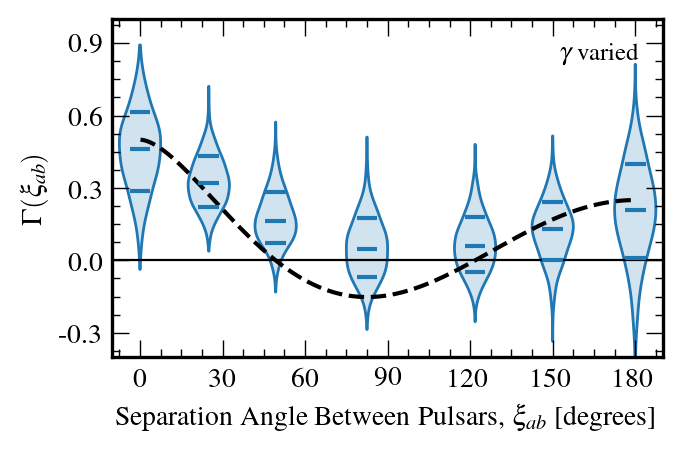

In [8]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches

fig = plt.figure()
ax = fig.add_subplot(111, rasterized=True)

ax.plot(np.linspace(0,np.pi,1000)*180.0/np.pi, 
        hd_orf(np.linspace(0,np.pi,1000)), 
        lw = 1.5, color='k', ls = '--')
ax.axhline(0, color='k', lw=0.8)

# violinplot of random samples
v1 = ax.violinplot(splorf_chain[:,:], positions=pos,
                   quantiles=q, bw_method=0.3,
                    widths=15.0, showextrema=False)

for pc in v1['bodies']:
    pc.set_facecolor('C0')
    pc.set_edgecolor('None')
    pc.set_linestyle('None')
    pc.set_alpha(0.2)
    
# violinplot of random samples
v2 = ax.violinplot(splorf_chain[:,:], positions=pos,
                   quantiles=None, bw_method=0.3,
                    widths=15.0, showextrema=False)

for pc in v2['bodies']:
    pc.set_facecolor('None')
    pc.set_edgecolor('C0')
    pc.set_linestyle('None')
    pc.set_alpha(1.0)

plt.xticks(labels = ['0', '30', '60', '90', '120', '150', '180'], 
           ticks = np.array([0, 30, 60, 90, 120, 150, 180]))
plt.xlabel(r'Separation Angle Between Pulsars, $\xi_{ab}$ [degrees]',fontsize=10)
plt.ylabel(r'$\Gamma(\xi_{ab})$') 

ax.set_xlim(-10.01,190.01)
ax.set_ylim(-0.4,1)
ax.set_yticks([-0.3, 0.0, 0.3, 0.6, 0.9])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

empty_patch = mpatches.Patch(color='none', 
                             label='$\gamma$ varied') 
plt.legend(handles=[empty_patch],loc='upper right',
           frameon=False,prop={'size': 9})

plt.show()
#plt.savefig('./nano15_splineorf_vg_violinplot_fig1_050423.pdf',bbox_inches='tight',dpi=400)